[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

# Polynomial Fit with LASSO Regularization

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 24/03/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0048RegressorPolynomialFitLasso.ipynb)

In [7]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.linear_model import Lasso
from sklearn.linear_model import lars_path, lasso_path
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, Dict, List, Optional, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image
from IPython.display import display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [8]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())


In [9]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2


In [10]:
# Courses Packages
import sys
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataVisualization import PlotRegressionData


In [11]:
# General Auxiliary Functions

def PlotPolyFitLasso( vX: np.ndarray, vY: np.ndarray, vP: Optional[np.ndarray] = None, P: int = 1, λ: float = 0.0, 
                     numGridPts: int = 1001, hA: Optional[plt.Axes] = None, figSize: Tuple[int, int] = FIG_SIZE_DEF, 
                     markerSize: int = MARKER_SIZE_DEF, lineWidth: int = LINE_WIDTH_DEF, axisTitle: str = None ) -> None:

    if hA is None:
        hF, hA = plt.subplots(1, 2, figsize = figSize)
    else:
        hF = hA[0].get_figure()

    numSamples = len(vY)

    # Polyfit
    if λ == 0:
        # No Lasso (Classic Polyfit)
        vW  = np.polyfit(vX, vY, P)
    else:
        # Lasso
        mX   = PolynomialFeatures(degree = P, include_bias = False).fit_transform(vX[:, None])
        oMdl = Lasso(alpha = λ, fit_intercept = True, max_iter = 500000).fit(mX, vY)
        # Lasso coefficients
        vW   = np.r_[oMdl.coef_[::-1], oMdl.intercept_]
    
    # R2 Score
    vHatY = np.polyval(vW, vX)
    R2    = r2_score(vY, vHatY)
    
    # Plot
    xx  = np.linspace(np.around(np.min(vX), decimals = 1) - 0.1, np.around(np.max(vX), decimals = 1) + 0.1, numGridPts)
    yy  = np.polyval(vW, xx)

    hA[0].plot(vX, vY, '.r', ms = 10, label = '$y_i$')
    hA[0].plot(xx, yy, 'b',  lw = 2,  label = '$\hat{f}(x)$')
    hA[0].set_title (f'P = {P}, R2 = {R2}')
    hA[0].set_xlabel('$x$')
    hA[0].set_xlim(left = xx[0], right = xx[-1])
    hA[0].set_ylim(bottom = np.floor(np.min(vY)), top = np.ceil(np.max(vY)))
    hA[0].grid()
    hA[0].legend()
    
    hA[1].stem(vW[::-1], label = 'Estimated')
    if vP is not None:
        hA[1].stem(vP[::-1], linefmt = 'g', markerfmt = 'gD', label = 'Ground Truth')
    hA[1].set_title('Coefficients')
    hA[1].set_xlabel('$w$')
    hA[1].set_ylim(bottom = -2, top = 6)
    hA[1].legend()


## Polynomial Fit with Regularization

The _Degrees of Freedom_ (DoF) of a _Polynomial_ model depends mainly on the polynomial degree.   
One way to _regularize_ the model is by using the degree parameter.  
Yet parameter is discrete hence harder to tune and the control the _Bias & Variance_ tradeoff.  

The model of smooth regularization is given by:

$$ \arg \min_{\boldsymbol{w}} \frac{1}{2} {\left\| X \boldsymbol{w} - \boldsymbol{y} \right\|}_{2}^{2} + \lambda R \left( \boldsymbol{w} \right) $$

Where $R \left( \cdot \right)$ is the regularizer and $\lambda \geq 0$ is the continuous regularization parameter where higher value means stronger regularization.  
The properties of the solution will be determined by the regularizer (Sparse, Lowe Values, etc...).  
The continuous regularization parameter allows smoother abd more finely tuned regularization.

* <font color='brown'>(**#**)</font> The model above can, in many cases, be interpreted as a _prior_ on the values of the parameters as in _Bayesian Estimation_ context.

In [12]:
# Parameters

# Data Generation
numSamples  = 50
noiseStd    = 0.3
vP = np.array([0.5, 2, 5])

# Model
polyDeg = 2
λ       = 0.1

# Data Visualization
gridNoiseStd = 0.05
numGridPts = 250

## Generate / Load Data

In the following we'll generate data according to the following model:

$$ y_{i} = f \left( x_{i} \right) + \epsilon_{i} $$

Where

$$ f \left( x \right) = \frac{1}{2} x^{2} + 2x + 5 $$


In [13]:
# The Data Generating Function

def f( vX: np.ndarray, vP: np.ndarray ) -> np.ndarray:
    # return 0.25 * (vX ** 2) + 2 * vX + 5
    return np.polyval(vP, vX)


hF = lambda vX: f(vX, vP)

In [14]:
# Generate Data

vX = np.linspace(-2, 2, numSamples, endpoint = True) + (gridNoiseStd * np.random.randn(numSamples))
vN = noiseStd * np.random.randn(numSamples)
vY = hF(vX) + vN

print(f'The features data shape: {vX.shape}')
print(f'The labels data shape: {vY.shape}')

The features data shape: (50,)
The labels data shape: (50,)


### Plot Data

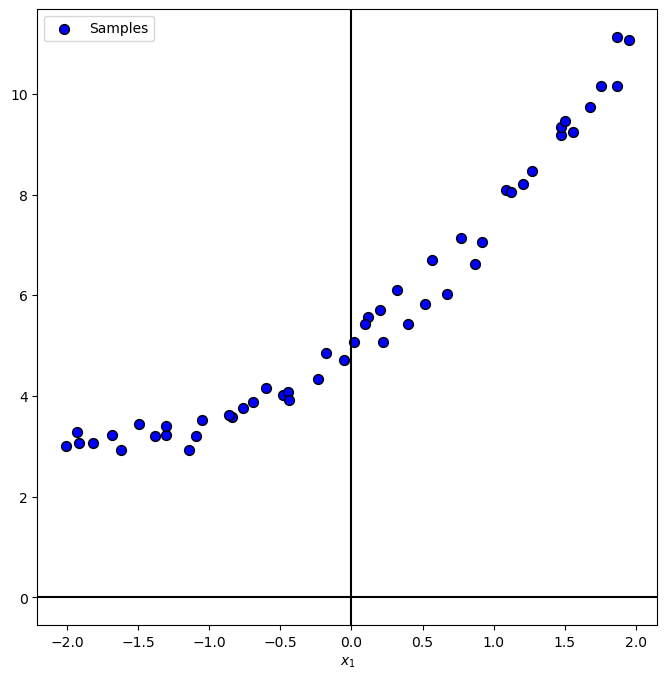

In [15]:
# Plot the Data

PlotRegressionData(vX, vY)

plt.show()


## Train Polyfit Regressor with LASSO Regularization

The ${L}_{1}$ regularized PolyFit optimization problem is given by:

$$ \arg \min_{\boldsymbol{w}} \frac{1}{2} {\left\| X \boldsymbol{w} - \boldsymbol{y} \right\|}_{2}^{2} + \lambda {\left\| \boldsymbol{w} \right\|}_{1} $$

Where

$$
\boldsymbol{X} = \begin{bmatrix} 1 & x_{1} & x_{1}^{2} & \cdots & x_{1}^{p} \\
1 & x_{2} & x_{2}^{2} & \cdots & x_{2}^{p} \\
\vdots & \vdots & \vdots &  & \vdots \\
1 & x_{N} & x_{N}^{2} & \cdots & x_{N}^{p}
\end{bmatrix}
$$

This regularization is called [_Least Absolute Shrinkage and Selection Operator_](https://en.wikipedia.org/wiki/Lasso_(statistics)) (LASSO).  
Since the ${L}_{1}$ norm promotes sparsity we basically have a feature selector built in.

![](https://i.imgur.com/GnvWPSp.png)


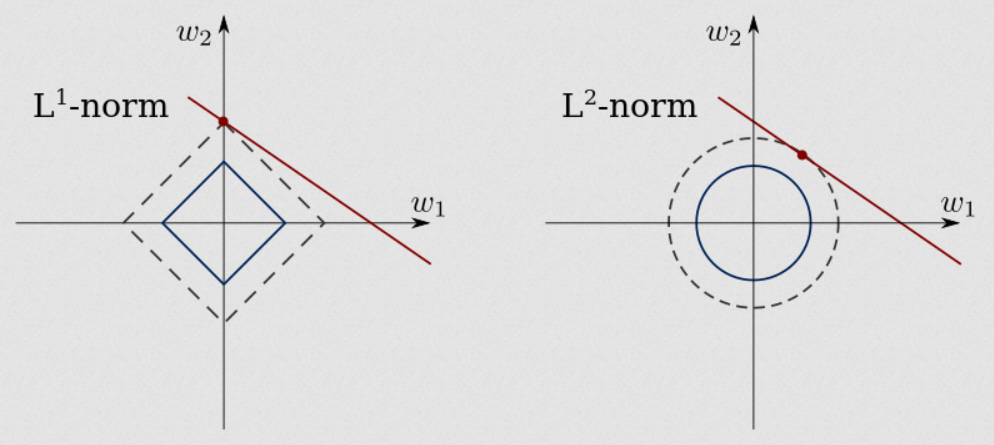

In [16]:
# Polynomial Fit with Lasso Regularization

mX         = PolynomialFeatures(degree = polyDeg, include_bias = False).fit_transform(vX[:, None]) #<! Build the model matrix
oLinRegL1  = Lasso(alpha = λ, fit_intercept = True, max_iter = 30000).fit(mX, vY)
vW         = np.r_[oLinRegL1.coef_[::-1], oLinRegL1.intercept_]

# Display the weights
vW

array([0.48820408, 1.95534482, 5.04258165])

### Plot Regressor for Various Regularization (λ) Values

Let's see the effect of the strength of the regularization on the data.

In [17]:
hPolyFitLasso = lambda λ: PlotPolyFitLasso(vX, vY, vP = vP, P = 15, λ = λ)
lamSlider = FloatSlider(min = 0, max = 1, step = 0.001, value = 0, readout_format = '.4f', layout = Layout(width = '30%'))
interact(hPolyFitLasso, λ = lamSlider)
plt.show()

interactive(children=(FloatSlider(value=0.0, description='λ', layout=Layout(width='30%'), max=1.0, readout_for…

* <font color='red'>(**?**)</font> How do you expect the ${R}^{2}$ score to behave with increasing $\lambda$?

## Lasso Path for Feature Importance

The _rise_ of a feature is similar to the correlation of the feature.  
Hence we cen use the _Lasso Path_ for feature selection / significance.

* <font color='brown'>(**#**)</font> The LASSO checks the conditional correlation. Namely the specific combination of the features.  
  While selection based on correlation is based on marginal correlation. Namely the value of specific feature (Its mean or other statistics).  
  In practice, LASSO potentially can make a good selection when there are inter correlations between the features.
* <font color='brown'>(**#**)</font> See [Partial / Conditional Correlation vs. Marginal Correlation](https://stats.stackexchange.com/questions/77318).

In [18]:
# Data from https://gist.github.com/seankross/a412dfbd88b3db70b74b
# mpg - Miles per Gallon
# cyl - # of cylinders
# disp - displacement, in cubic inches
# hp - horsepower
# drat - driveshaft ratio
# wt - weight
# qsec - 1/4 mile time; a measure of acceleration
# vs - 'V' or straight - engine shape
# am - transmission; auto or manual
# gear - # of gears
# carb - # of carburetors
dfMpg = pd.read_csv('https://github.com/FixelAlgorithmsTeam/FixelCourses/raw/master/DataSets/mtcars.csv')
dfMpg

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [19]:
# Data for Analysis
# The target data is the fuel consumption (`mpg`).
dfX = dfMpg.drop(columns = ['model', 'mpg'], inplace = False)
dfX = (dfX - dfX.mean()) / dfX.std() #<! Normalize
dsY = dfMpg['mpg'].copy() #<! Data Series

In [20]:
# LASSO Path Analysis

alphasPath, coefsPath, *_ = lasso_path(dfX, dsY)
# alphasPath, coefsPath, *_ = lars_path(dfX, dsY, method = 'lasso')

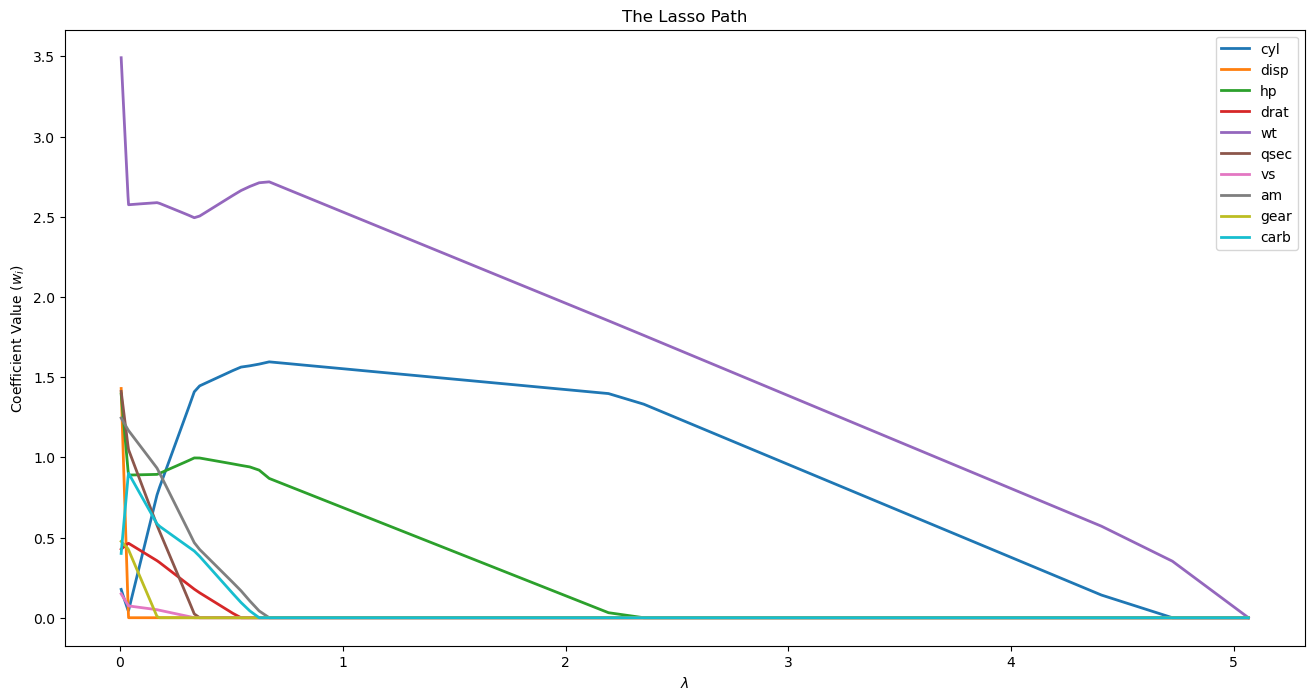

In [23]:
# Display the LASSO Path

hF, hA = plt.subplots(figsize = (16, 8))
hA.plot(alphasPath, np.abs(coefsPath.T), lw = 2, label = dfX.columns.to_list())
hA.set_title('The Lasso Path')
hA.set_xlabel('$\lambda$')
hA.set_ylabel('Coefficient Value (${w}_{i}$)')
hA.legend()
plt.show()


* <font color='brown'>(**#**)</font> Feature selection can be an objective on its own. For instance, think of a questionary of insurance company to assess the risk of the customer.  
  Achieving the same accuracy in the risk assessment with less questions (Features) is valuable on its own.  
  See [Why LASSO for Feature Selection](https://stats.stackexchange.com/questions/367155).

## test cross correlation of top features

<Axes: >

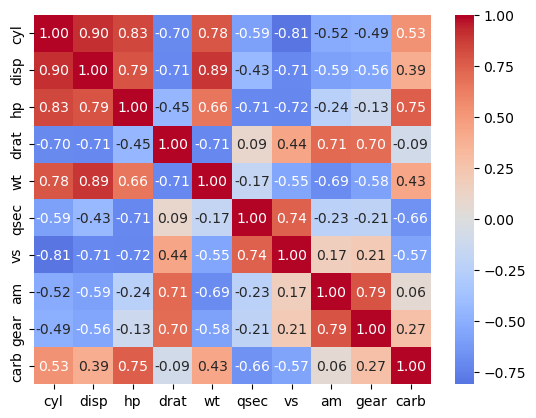

In [25]:
sns.heatmap(dfX.corr(), annot = True, cmap = 'coolwarm', center = 0, fmt = '.2f')